# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
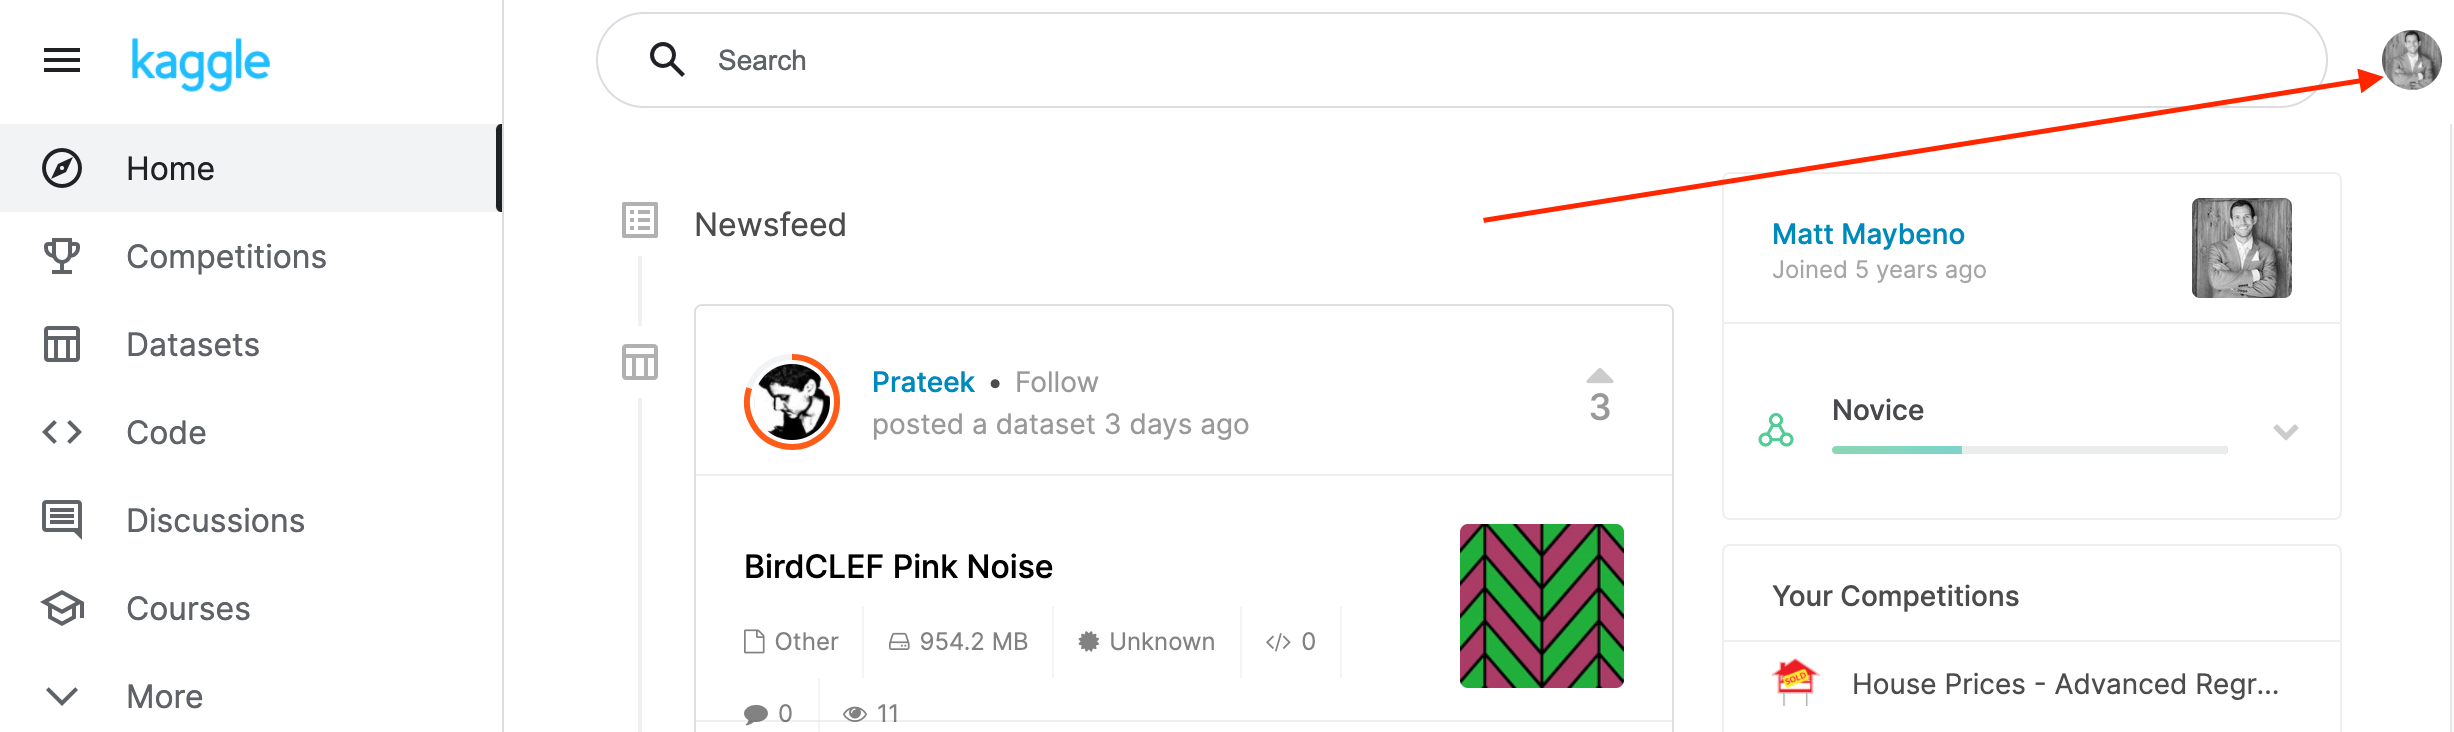
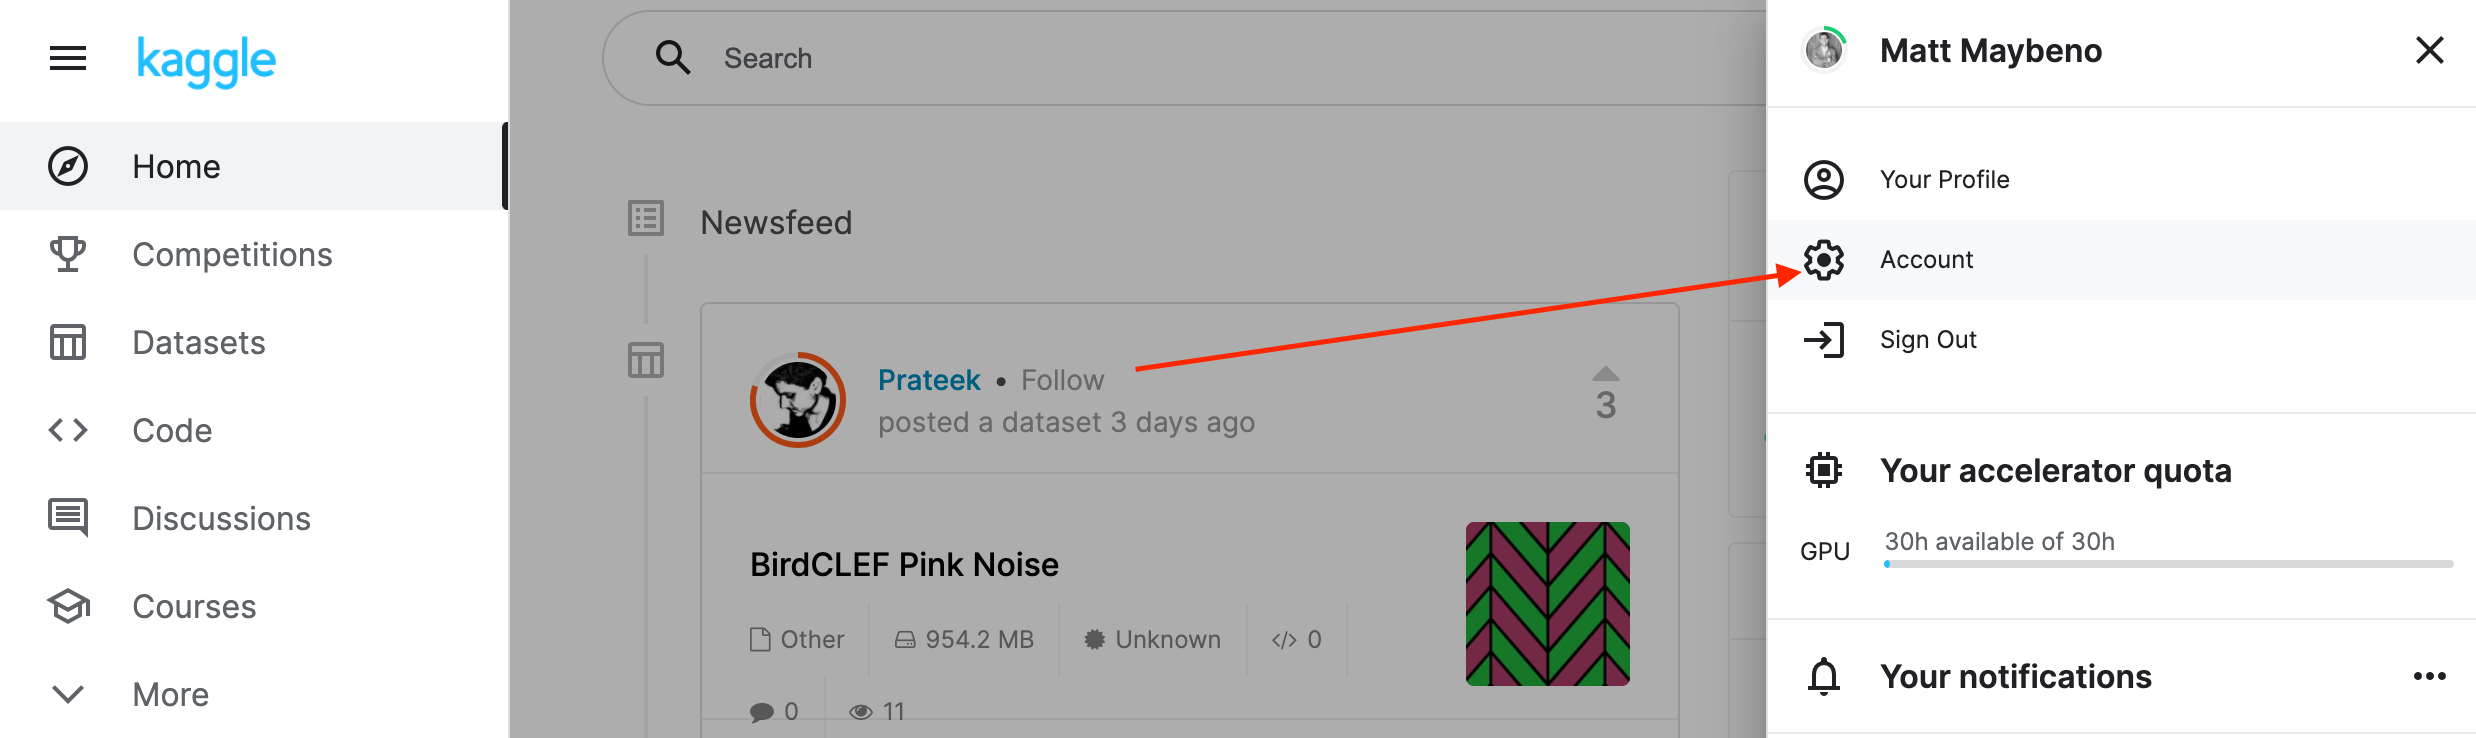
2. Scroll down to API and click Create New API Token.
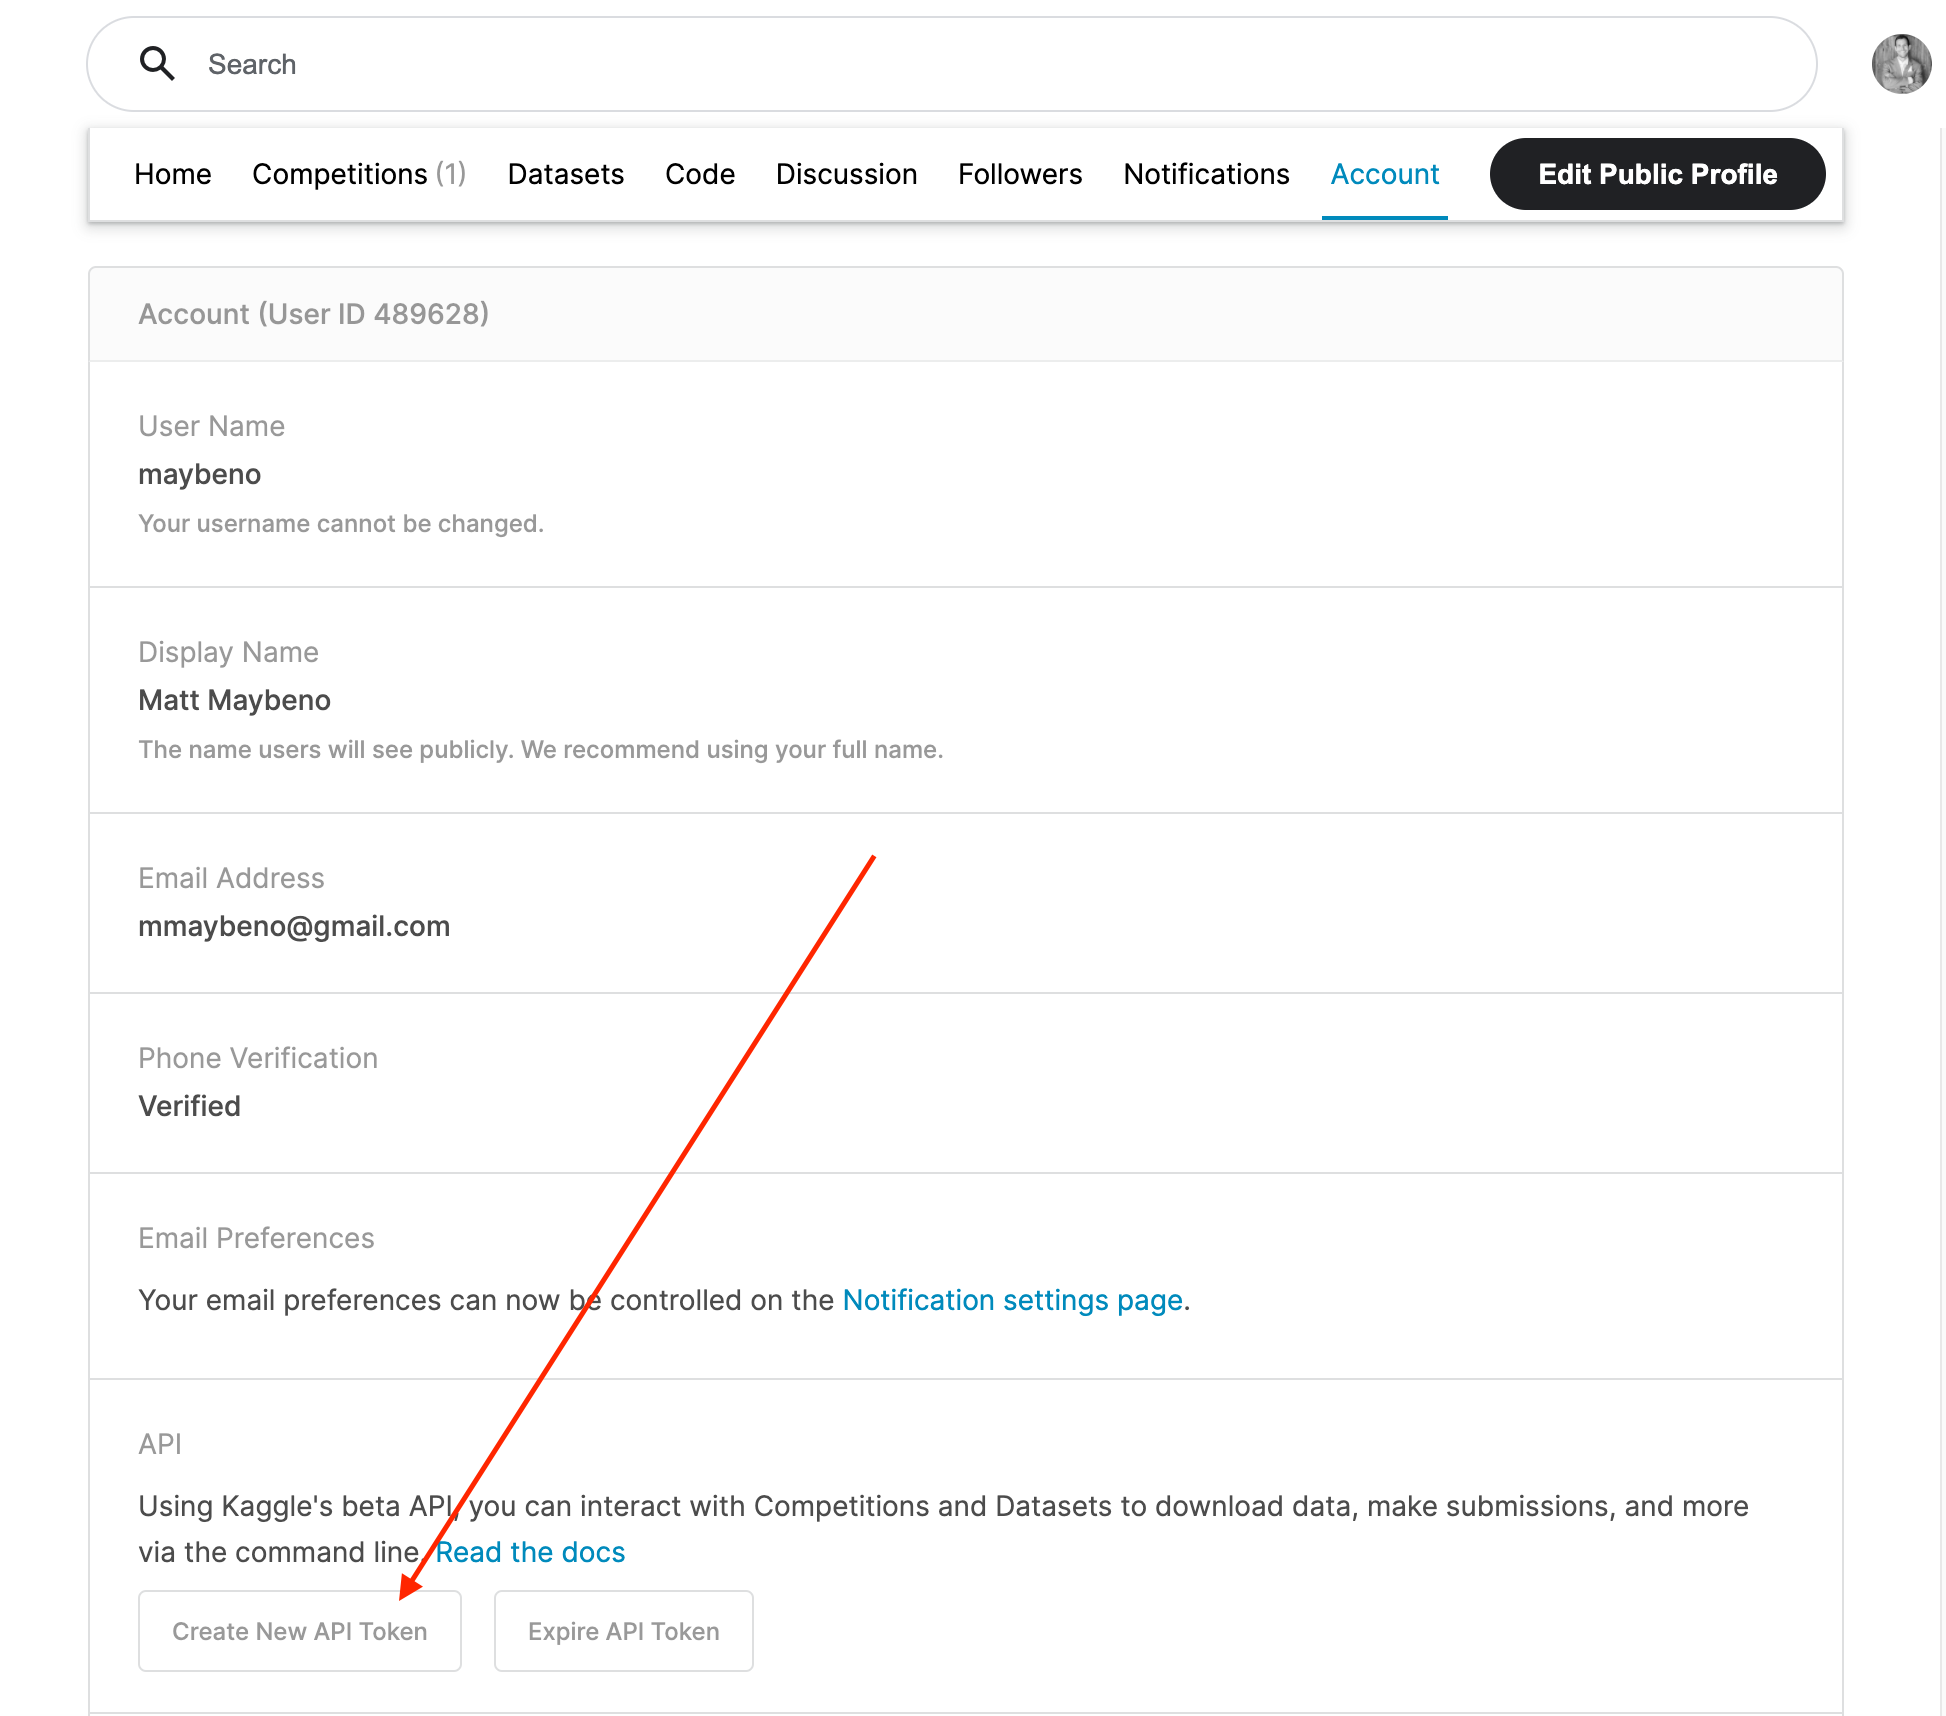
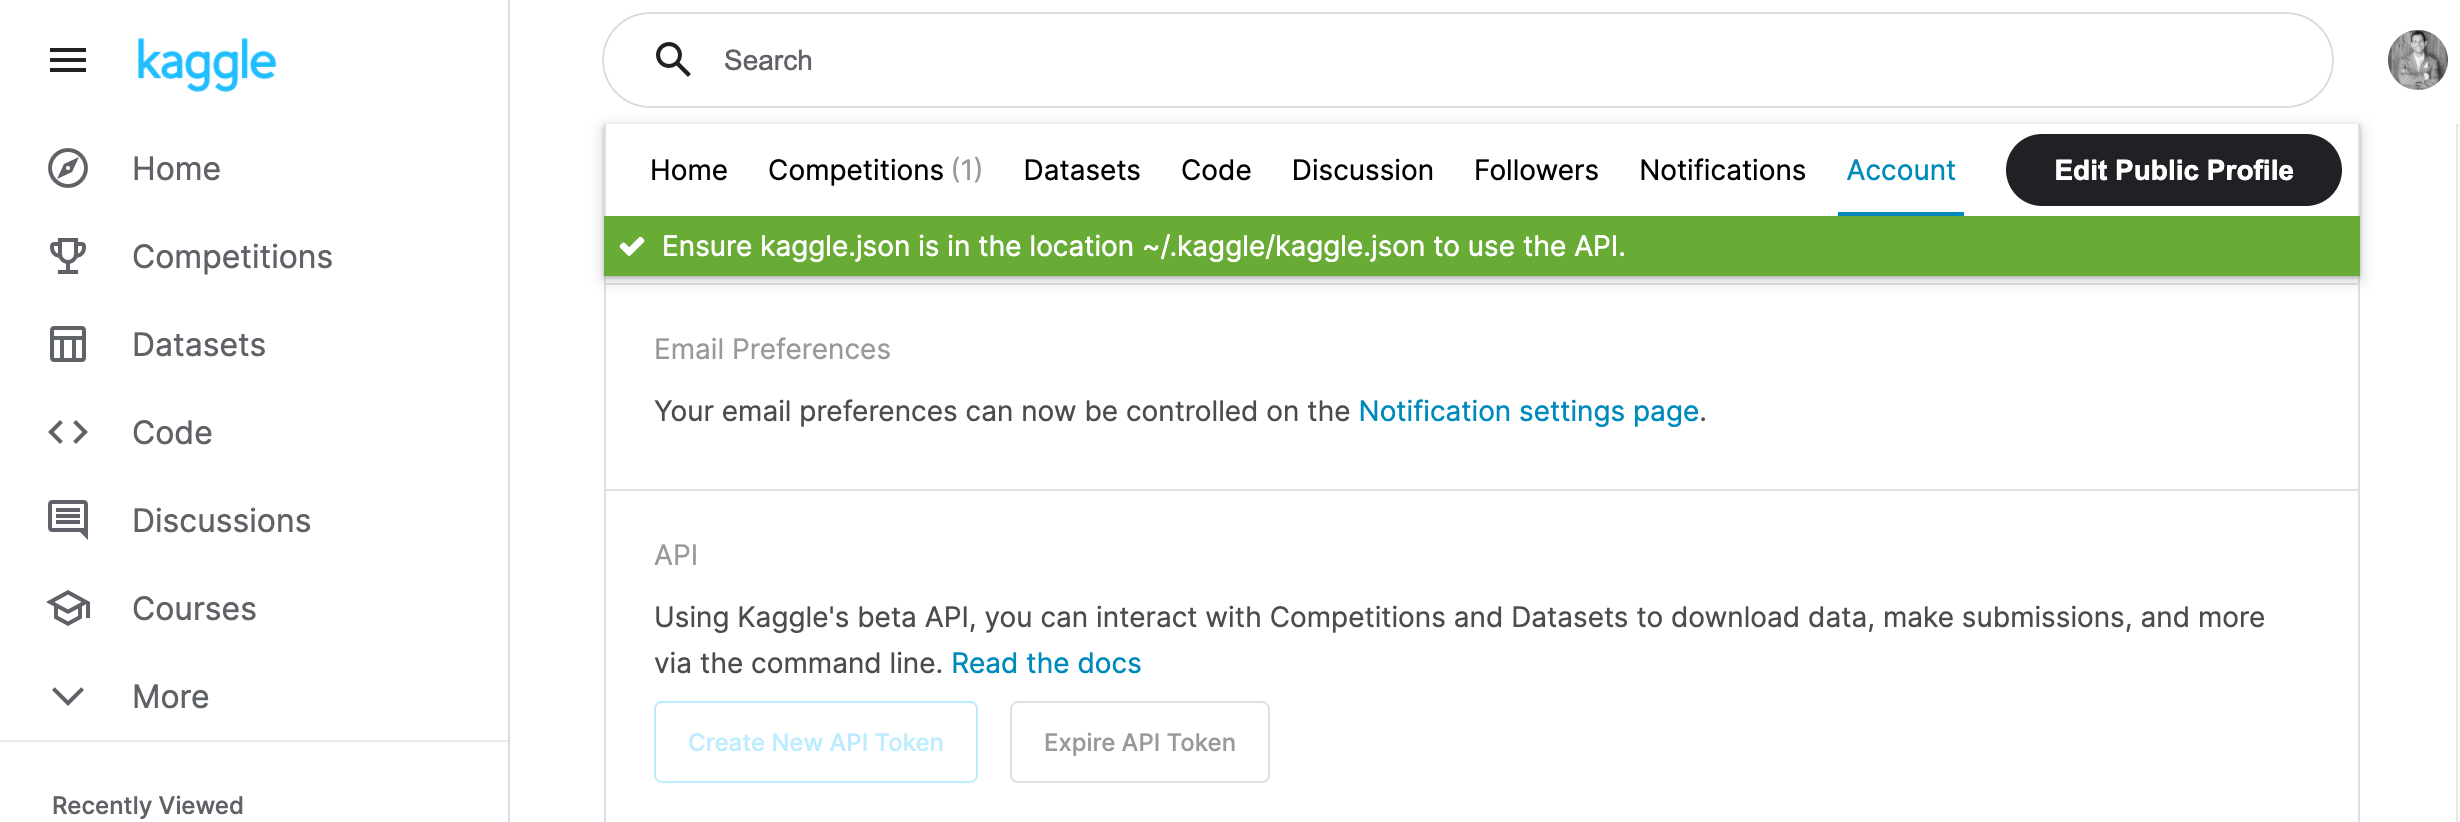
3. Open up `kaggle.json` and use the username and key.
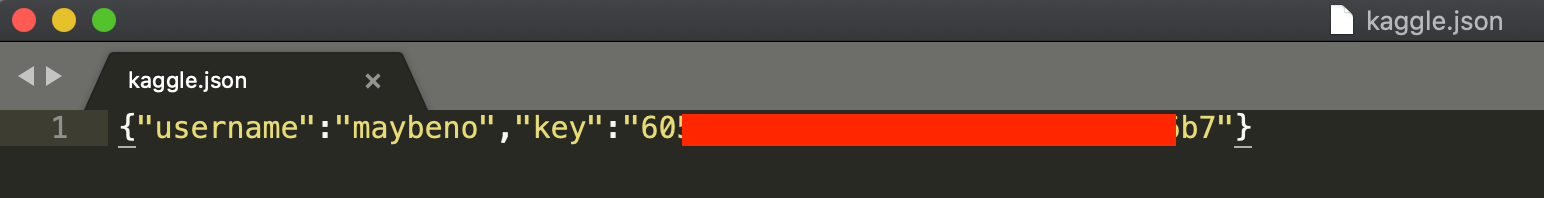

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
#!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Setup Kaggle API Key

In [9]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/kaggle
!touch /root/kaggle/kaggle.json
!chmod 600 /root/kaggle/kaggle.json

In [10]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "mohamednlpaiann"
kaggle_key = "3d69ee60c5721cc28e91216d0985a91f"

# Save API token the kaggle.json file
with open("/root/kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
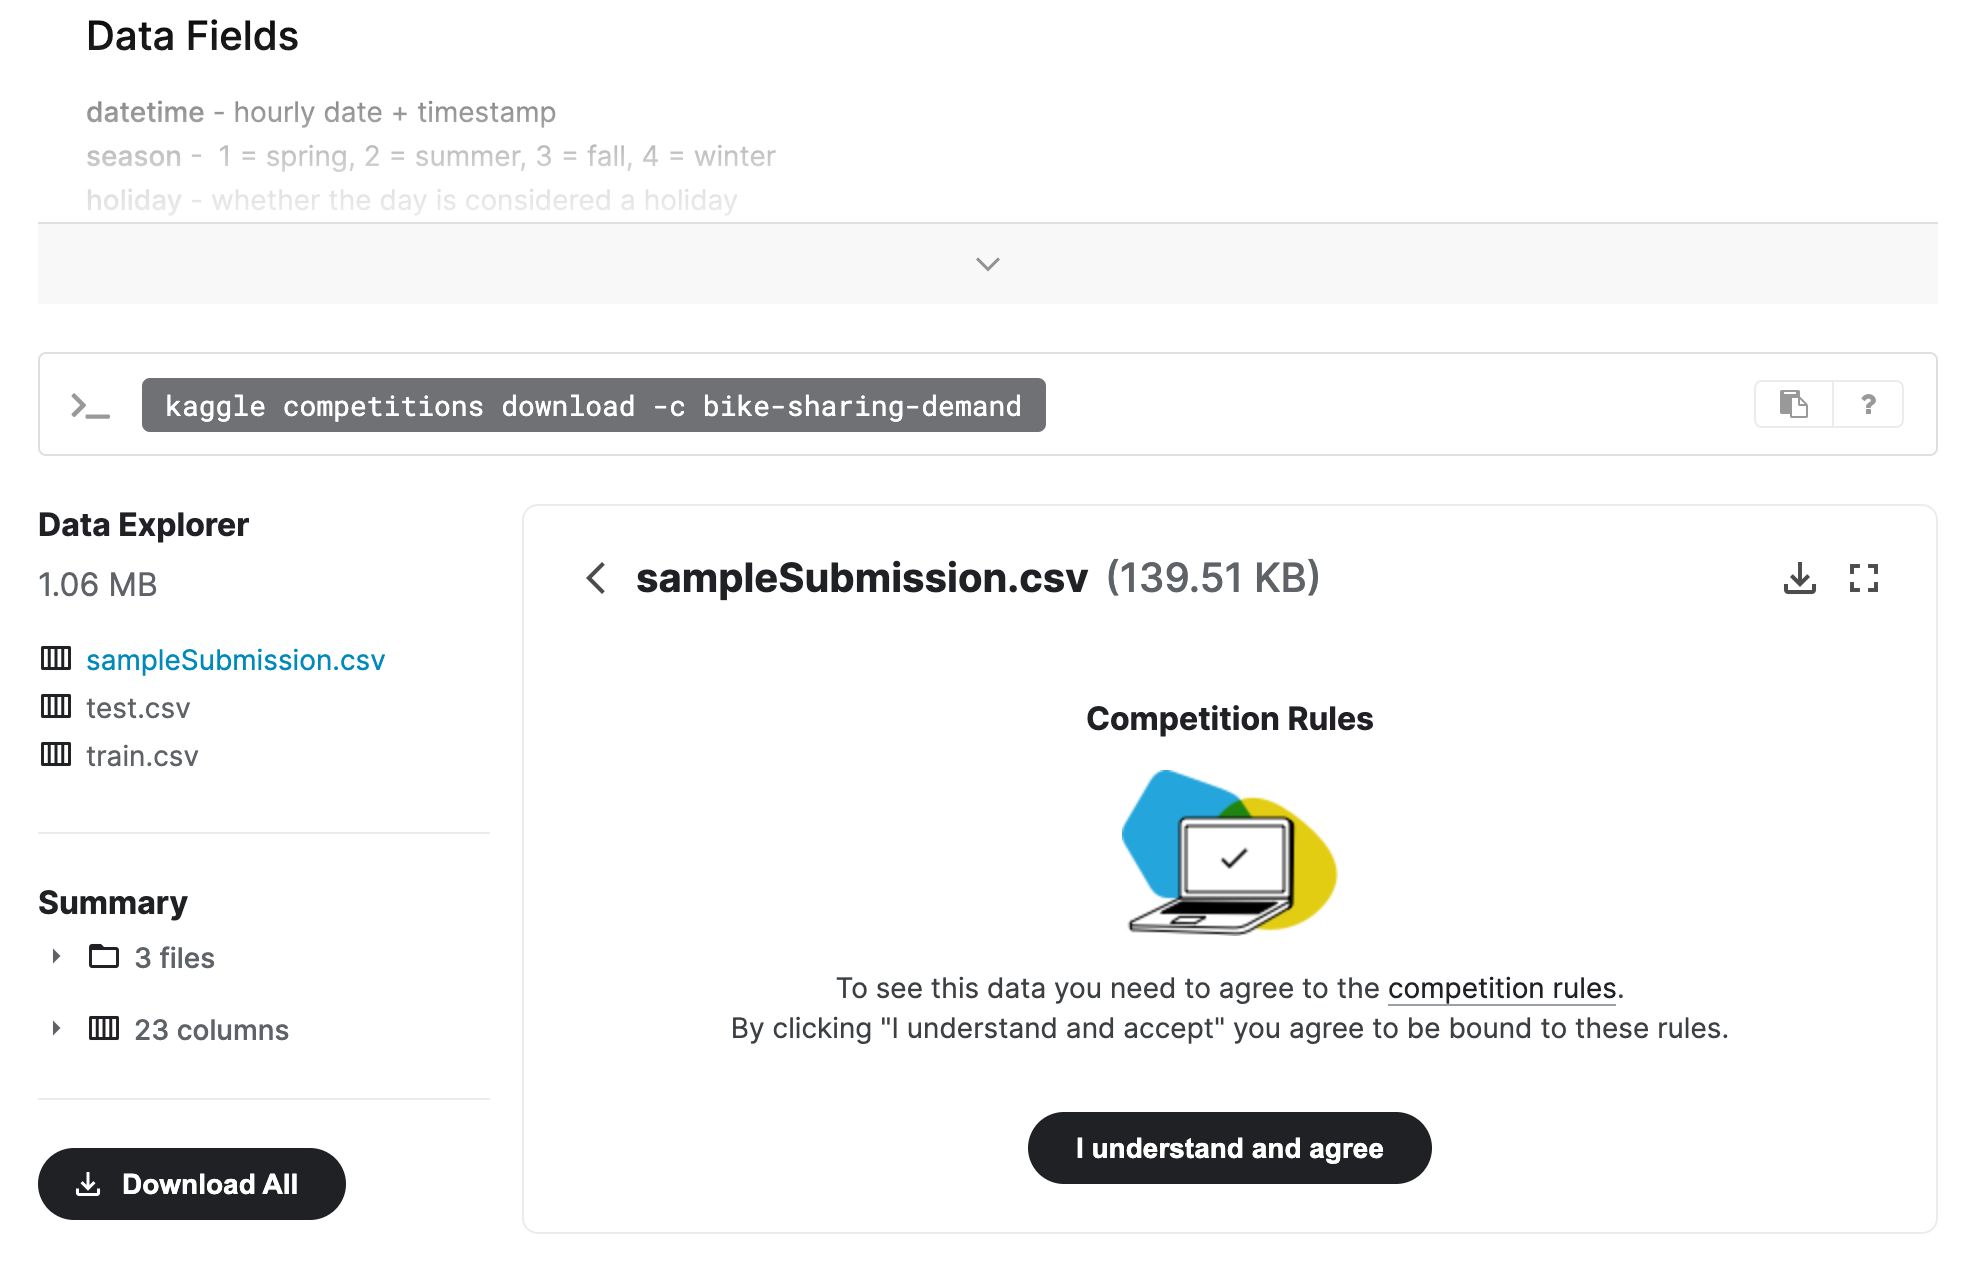

In [3]:
!pip install kaggle

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [19]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
td=train.loc[:,train.columns!="casual"]
td=td.loc[:,td.columns!="registered"]
#train.head()
td.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [40]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [6]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [7]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [8]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train_data=td,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_122656/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_122656/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.823309      11.380394  435.125729                0.006426           0.736882            3       True         15
1   RandomForestMSE_BAG_L2  -53.424397      10.583930  403.900023                0.595845          25.468637            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.837045      10.567988  386.196913                0.579904           7.765527            2       True         14
3          LightGBM_BAG_L2  -55.058655      10.198218  401.154682                0.210134          22.723296            2       True         11
4          CatBoost_BAG_L2  -55.780975      10.064880  444.455272                0.076796          66.023886            2       True         13
5        LightGBMXT_BAG_L2  -60.527467      13.524679  427.123124         

<AxesSubplot:xlabel='model'>

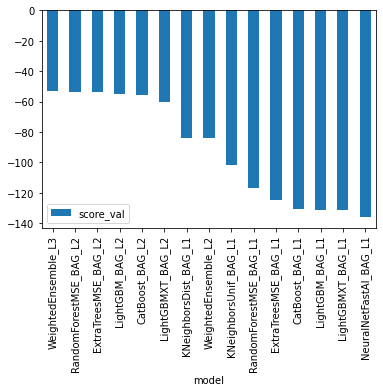

In [9]:
predictor.fit_summary()
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [10]:
predictions = predictor.predict(test)
predictions.head()

0    24.390205
1    41.412945
2    44.664505
3    48.464424
4    51.755352
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [11]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.559677
std        90.256371
min         3.057834
25%        21.140060
50%        63.076565
75%       169.655289
max       364.785034
Name: count, dtype: float64

In [12]:
# How many negative values do we have?
print(sum(predictions<0))

0


In [13]:
# Set them to zero
predictions=predictions.apply(lambda x : 0 if x<0 else x)
print(sum(predictions<0))
predictions.describe()

0


count    6493.000000
mean      100.559673
std        90.256368
min         3.057834
25%        21.140060
50%        63.076565
75%       169.655289
max       364.785034
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [14]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [15]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 419kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [16]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-01-01 12:55:51  first raw submission               complete  1.80736      1.80736       
submission_new_hpo.csv       2022-12-31 23:03:42  new features with hyperparameters  complete  0.48543      0.48543       
submission_new_hpo.csv       2022-12-31 21:50:37  new features with hyperparameters  complete  0.51359      0.51359       
submission_new_features.csv  2022-12-31 21:49:54  new features                       complete  0.46721      0.46721       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

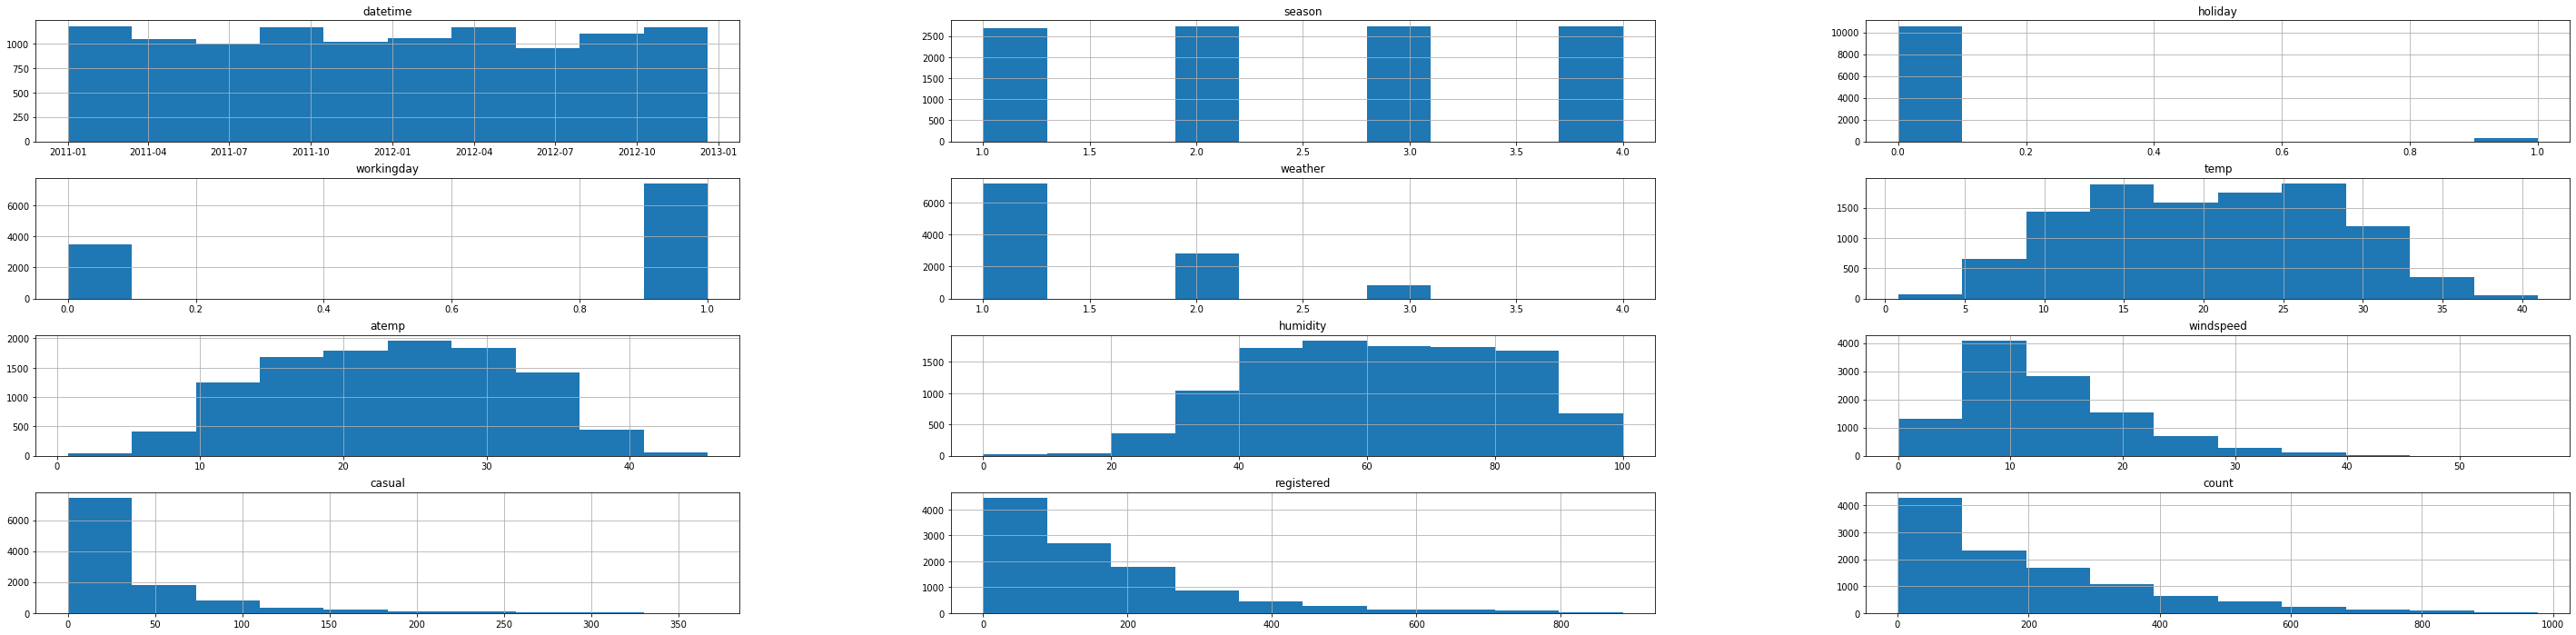

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(50,12));

In [17]:
# create a new feature
train["month"] = train.datetime.dt.month
train["day"]   = train.datetime.dt.day
train["hour"]  = train.datetime.dt.hour
test["month"]  = test.datetime.dt.month
test["day"]    = test.datetime.dt.day
test["hour"]   = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [18]:
train["season"] = train.season.astype("category")
train["weather"] = train.weather.astype("category")
test["season"] = test.season.astype("category")
test["weather"] = test.weather.astype("category")

In [19]:
td=train.loc[:,train.columns!="casual"]
td=td.loc[:,td.columns!="registered"]

In [20]:
# View are new feature
train.head()
td.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  month  day  hour  
0        81        0.0     16      1    1     0  
1        80        0.0     40      1    1     1  
2        80        0.0     32      1    1     2  
3        75        0.0     13      1    1     3  
4        75        0.0      1      1    1     4

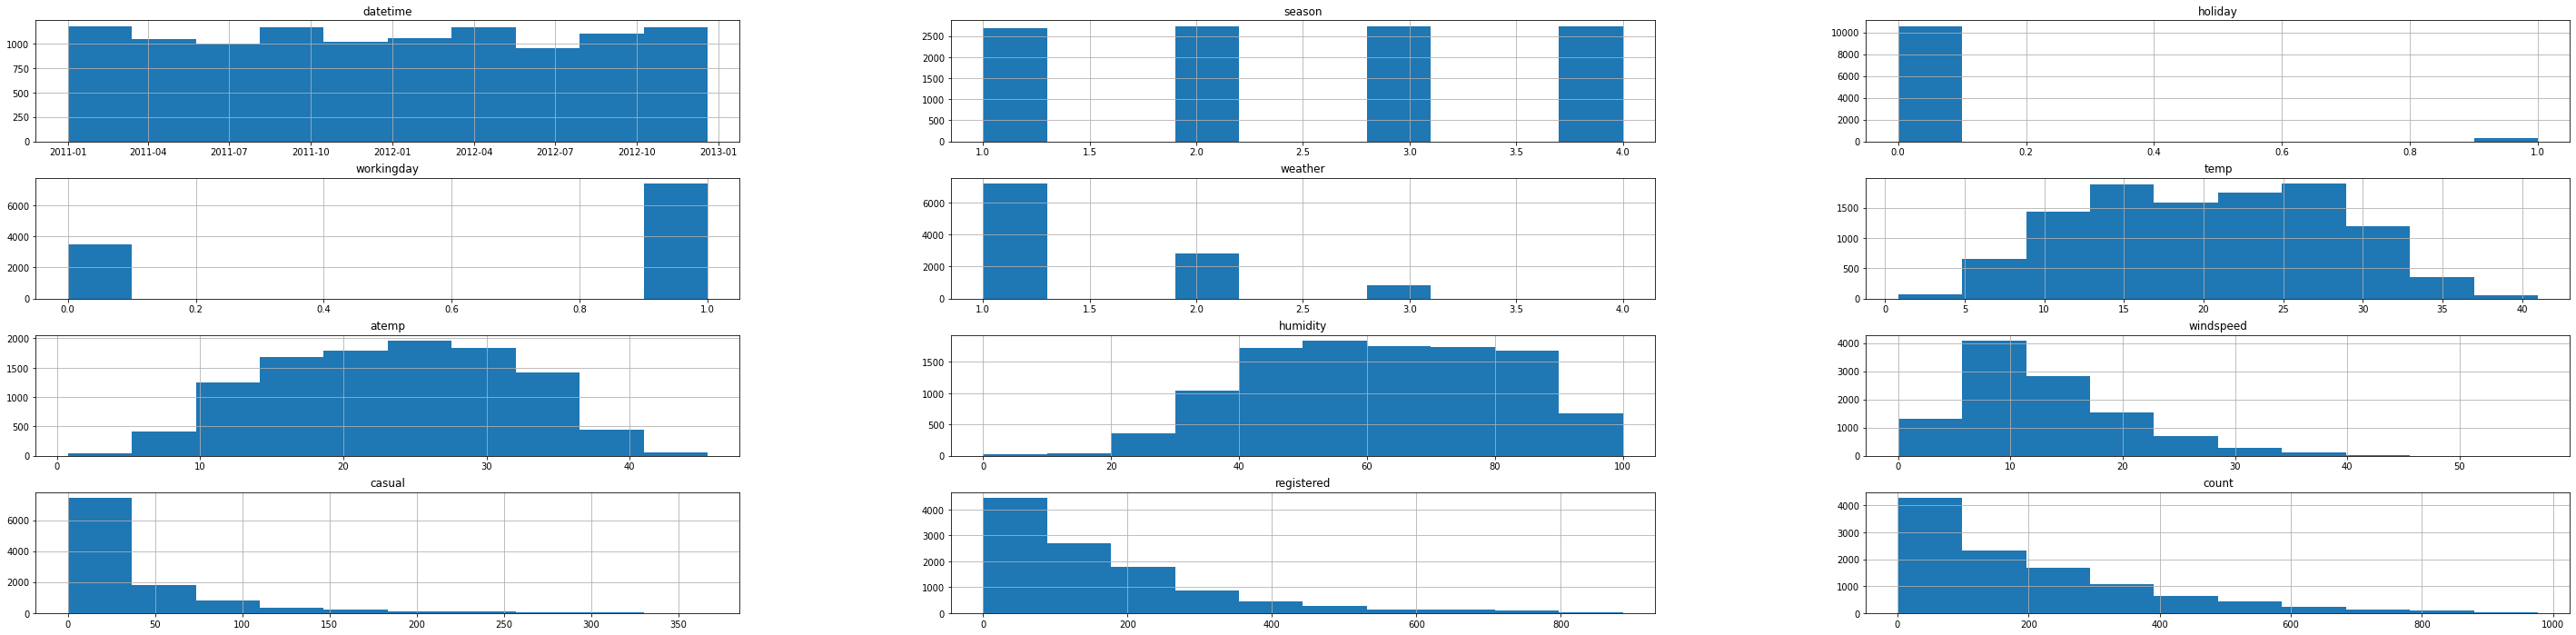

In [23]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(50,12));

## Step 5: Rerun the model with the same settings as before, just with more features

In [21]:
predictor_new_features = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train_data=td,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_125629/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_125629/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [22]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.170007      21.582528  566.892038                0.000846           0.320498            3       True         15
1          CatBoost_BAG_L2  -30.399745      19.179437  479.018193                0.113135          82.469045            2       True         13
2          LightGBM_BAG_L2  -30.607050      19.386760  419.477581                0.320458          22.928432            2       True         11
3        LightGBMXT_BAG_L2  -31.100270      19.934310  422.819397                0.868009          26.270248            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.360219      19.665227  405.396708                0.598925           8.847559            2       True         14
5   RandomForestMSE_BAG_L2  -31.595520      19.681155  426.056256         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.36098453963965,
  'LightGBM_BAG_L1': -3

In [23]:
# Remember to set all negative values to zero
predictions=predictor_new_features.predict(test)
predictions=predictions.apply(lambda x : 0 if x<0 else x)
print(sum(predictions<0))
predictions.describe()

0


count    6493.000000
mean      150.879090
std       130.079488
min         1.739659
25%        53.724667
50%       116.022217
75%       214.644440
max       819.700378
Name: count, dtype: float64

In [25]:
# Same submitting predictions
submission_new_features=submission
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 539kB/s]
Successfully submitted to Bike Sharing Demand

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-01 13:32:34  new features                       complete  0.69050      0.69050       
submission.csv               2023-01-01 12:55:51  first raw submission               complete  1.80736      1.80736       
submission_new_hpo.csv       2022-12-31 23:03:42  new features with hyperparameters  complete  0.48543      0.48543       
submission_new_hpo.csv       2022-12-31 21:50:37  new features with hyperparameters  complete  0.51359      0.51359       


#### New Score of `0.66232`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [39]:
hyperparameters = {"FASTAI":{"emb_drop":0.01},"CAT":{"max_depth":12},
"XGB": {"max_depth":12}
}

In [28]:
import autogluon

In [31]:
autogluon.tabular.models.catboost.hyperparameters.parameters.get_param_regression_baseline()

{'iterations': 10000, 'learning_rate': 0.05}

In [53]:
td.describe()

holiday    workingday         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.028569      0.680875     20.23086     23.655084     61.886460   
std        0.166599      0.466159      7.79159      8.474601     19.245033   
min        0.000000      0.000000      0.82000      0.760000      0.000000   
25%        0.000000      0.000000     13.94000     16.665000     47.000000   
50%        0.000000      1.000000     20.50000     24.240000     62.000000   
75%        0.000000      1.000000     26.24000     31.060000     77.000000   
max        1.000000      1.000000     41.00000     45.455000    100.000000   

          windspeed         count         month           day          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395    191.574132      6.521495      9.992559     11.541613  
std        8.164537    181.144454      3.444373      5.476608      6.915838  
min        0.000000      1.000000      1.000000      1.000000      0.000000  
25%        7.001500     42.000000      4.000000      5.000000      6.000000  
50%       12.998000    145.000000      7.000000     10.000000     12.000000  
75%       16.997900    284.000000     10.000000     15.000000     18.000000  
max       56.996900    977.000000     12.000000     19.000000     23.000000

In [40]:
predictor_new_hpo = TabularPredictor(label="count",eval_metric="root_mean_squared_error",problem_type="regression").fit(train_data=td,time_limit=1200,presets="best_quality",hyperparameters=hyperparameters,hyperparameter_tune_kwargs="auto")

Fitted model: NeuralNetFastAI_BAG_L2/478f7aa8 ...
	-35.4284	 = Validation score   (-root_mean_squared_error)
	98.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetFastAI_BAG_L2/4899566c ...
	-35.1387	 = Validation score   (-root_mean_squared_error)
	64.19s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 163.3s of the 214.98s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-36.8992	 = Validation score   (-root_mean_squared_error)
	71.12s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-36.3552	 = Validation score   (-root_mean_squared_error)
	44.49s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats

In [41]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                              model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               WeightedEnsemble_L3  -34.886794       0.002488  691.796609                0.000982           0.278800            3       True         11
1   NeuralNetFastAI_BAG_L2/4899566c  -35.138716       0.001183  476.953032                0.000120          64.190284            2       True          8
2   NeuralNetFastAI_BAG_L2/478f7aa8  -35.428395       0.001179  511.721954                0.000117          98.959206            2       True          7
3               WeightedEnsemble_L2  -35.709856       0.001243  272.683635                0.000740           0.301146            2       True          6
4                 XGBoost_BAG_L2/T2  -36.355202       0.001190  457.248170                0.000127          44.485422            2       True         10
5                 XG

{'model_types': {'NeuralNetFastAI_BAG_L1/eeb7ad48': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetFastAI_BAG_L1/efafc80c': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetFastAI_BAG_L1/2c873670': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2/478f7aa8': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetFastAI_BAG_L2/4899566c': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetFastAI_BAG_L1/eeb7ad48': -44.38285539772817,
  'NeuralNetFastAI_BAG_L1/efafc80c': -98.61912593162529,
  'NeuralNetFastAI_BAG_L1/2c873670': -116.34449391819483,
  'XGBoost_BAG_L1/T1': -37.33794615763313,
  'XGBoost_BAG_L1/T2': -38.7075651242366,
 

In [42]:
# Remember to set all negative values to zero
predictions=predictor_new_hpo.predict(test)
predictions=predictions.apply(lambda x : 0 if x<0 else x)
print(sum(predictions<0))
predictions.describe()

0


count    6493.000000
mean      189.672150
std       168.664726
min         0.000000
25%        49.869999
50%       148.243179
75%       281.079346
max       890.369690
Name: count, dtype: float64

In [43]:
# Same submitting predictions
submission_new_hpo=submission
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 242k/242k [00:00<00:00, 467kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-01 14:15:06  new features with hyperparameters  complete  0.49875      0.49875       
submission_new_features.csv  2023-01-01 13:32:34  new features                       complete  0.69050      0.69050       
submission.csv               2023-01-01 12:55:51  first raw submission               complete  1.80736      1.80736       
submission_new_hpo.csv       2022-12-31 23:03:42  new features with hyperparameters  complete  0.48543      0.48543       


#### New Score of `0.69539`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

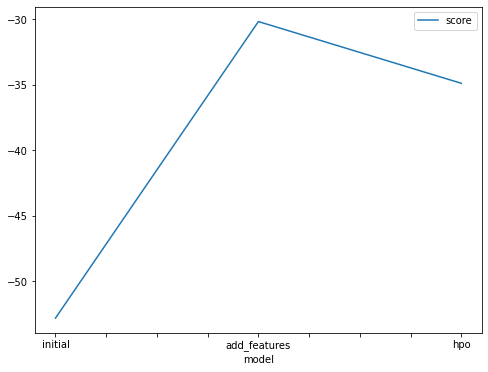

In [51]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.823309, -30.170007, -34.886794]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

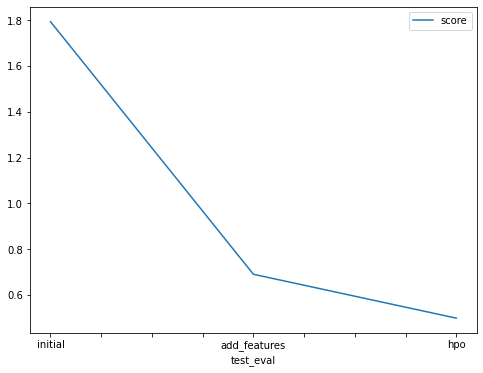

In [52]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.7941, 0.69050 , 0.49875]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [54]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "fastai:emb_drop": [0.1, 0.1, 0.01],
    "xgb:max_depth": [6, 6, 12],
    "cat:max_depth": [6, 6 ,12],
    "score": [1.7941, 0.69050 , 0.49875]
})

model  fastai:emb_drop  xgb:max_depth  cat:max_depth    score
0       initial             0.10              6              6  1.79410
1  add_features             0.10              6              6  0.69050
2           hpo             0.01             12             12  0.49875